In [23]:
import operator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from functools import reduce
from collections import Counter
from numpy import nan
import matplotlib.ticker as plticker

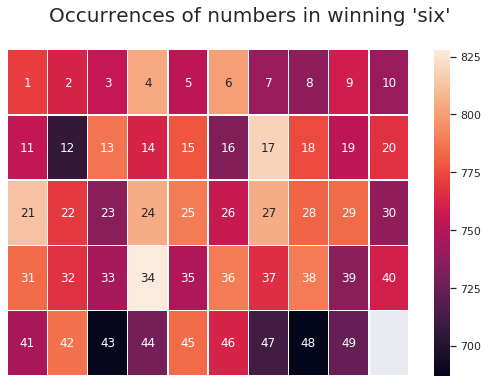

In [16]:
def flatten_list(collection):
    return reduce(operator.iconcat, collection, [])


def convert_list_of_tuples_to_2D_array():
    # add occurancies for 50 number
    occurrences.append(min(occurrences))
    np_data = np.array(occurrences)
    two_dim_data = np_data.reshape((5, 10))
    return two_dim_data

sns.set()
data = pd.read_csv("data/lotto.csv")
rows = data["winning_numbers"].drop_duplicates()
winning_numbers_list = flatten_list(map(lambda number_list: map(int, number_list.split(',')), rows))
winning_numbers_counter = Counter(winning_numbers_list)
sorted_winning_numbers_by_key = sorted(winning_numbers_counter.items(), key=operator.itemgetter(0))
occurrences = list(map(lambda x: x[1], sorted_winning_numbers_by_key))
result = convert_list_of_tuples_to_2D_array()
mask = np.zeros_like(result)
mask[-1,-1] = 1
annot = np.arange(1,51).reshape((5,10))
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle("Occurrences of numbers in winning 'six'", fontsize=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
sns.heatmap(result, linewidths=.5, ax=ax,annot = annot,mask = mask)


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'Number of terrorist attacks by world regions')

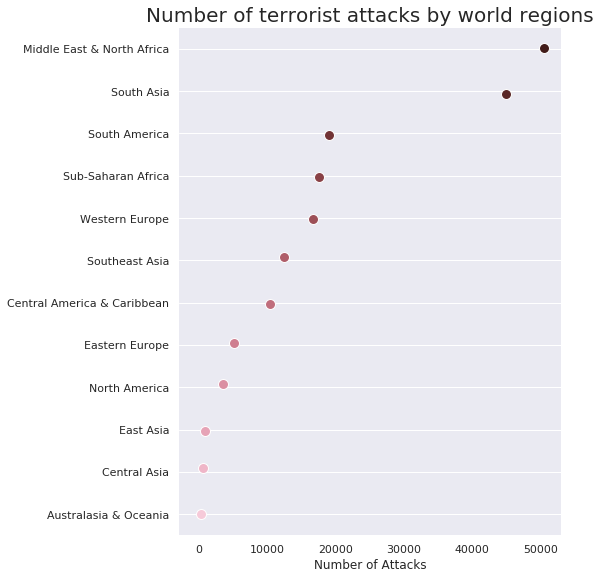

In [17]:
terrorist_attacks = pd.read_csv("data/globalterrorismdb.csv",encoding = "ISO-8859-1")
data = terrorist_attacks.groupby('region_txt',as_index = False)[['eventid']].count()
# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
#sns.FacetGrid(data, row='region_txt',col='eventid',hue='eventid', aspect=15, height=.5, palette=pal)
data_sorted = data.sort_values("eventid",ascending = False)
g = sns.PairGrid(data_sorted,x_vars = ["eventid"], y_vars=["region_txt"],
                 height=8, aspect=.8)
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")
g.set(xlabel="Number of Attacks", ylabel="")
for ax in g.axes.flat:
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
plt.title("Number of terrorist attacks by world regions", fontsize = 20)

In [19]:
data = pd.read_csv("data/lotto.csv") 
data.head()

,amount_won,date,level,lottery_nr,winners_number,winning_numbers
0,9793759.5,12-03-2019,szóstka,6229,1.0,"3,11,17,26,34,36"
1,5005.1,12-03-2019,piątka,6229,63.0,"3,11,17,26,34,36"
2,112.7,12-03-2019,czwórka,6229,3458.0,"3,11,17,26,34,36"
3,24.0,12-03-2019,trójka,6229,62594.0,"3,11,17,26,34,36"
4,0.0,09-03-2019,szóstka,6228,0.0,"4,6,15,18,41,43"


In [20]:
data['year'] = pd.DatetimeIndex(data['date']).year
data.head()

,amount_won,date,level,lottery_nr,winners_number,winning_numbers,year
0,9793759.5,12-03-2019,szóstka,6229,1.0,"3,11,17,26,34,36",2019
1,5005.1,12-03-2019,piątka,6229,63.0,"3,11,17,26,34,36",2019
2,112.7,12-03-2019,czwórka,6229,3458.0,"3,11,17,26,34,36",2019
3,24.0,12-03-2019,trójka,6229,62594.0,"3,11,17,26,34,36",2019
4,0.0,09-03-2019,szóstka,6228,0.0,"4,6,15,18,41,43",2019


In [21]:
data_agg = data.groupby('year')['winners_number'].sum().reset_index()
data_agg = data_agg.replace(0.0,nan)
data_agg = data_agg.dropna()
data_agg.head(50)
data_agg['winners_number'] = data_agg['winners_number']/1000000

Text(0, 0.5, 'Number of winners [millions]')

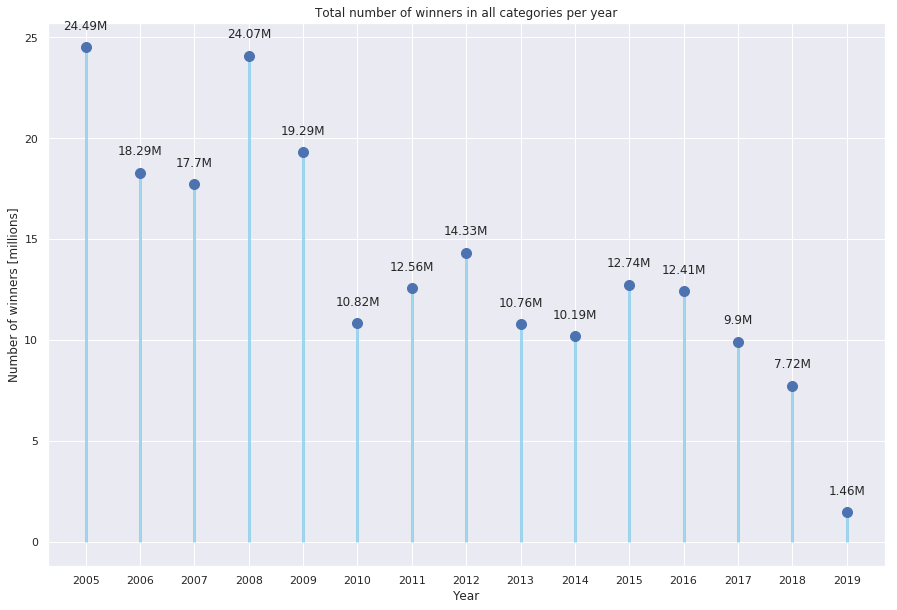

In [24]:
my_range= data_agg['year']

sns.set()
sns.set(rc={'figure.figsize':(15,10)})

fig, ax = plt.subplots()


ax.vlines(x=data_agg['year'], ymin=0, ymax=data_agg['winners_number'], color='skyblue', alpha=0.8, linewidth=3)
# ax.scatter(x=data_agg['year'], y = data_agg['winners_number'], s=75, color='darkblue', alpha=0.7)

ax.plot(my_range, data_agg['winners_number'], "o", markersize=10)


loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.ticklabel_format(useOffset=False, style='plain')

for row in data_agg.itertuples():
    ax.text(row.year, row.winners_number, s=str(round(row.winners_number, 2)) + "M\n", horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.title("Total number of winners in all categories per year")
plt.xlabel('Year')
plt.ylabel('Number of winners [millions]')


In [26]:
df = pd.read_csv("data/globalterrorismdb.csv", engine="python") 
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [27]:
df_country = df['country_txt'].value_counts().reset_index(name='attacks').nlargest(40, 'attacks')
df_country.head()

,index,attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [28]:
df_success = df.loc[df['success'] == 1]
df_success.head()
df_success_country = df_success['country_txt'].value_counts().reset_index(name='successful').nlargest(40, 'successful')
df_success_country.head()

,index,successful
0,Iraq,21861
1,Pakistan,12600
2,Afghanistan,11141
3,India,10280
4,Colombia,7712


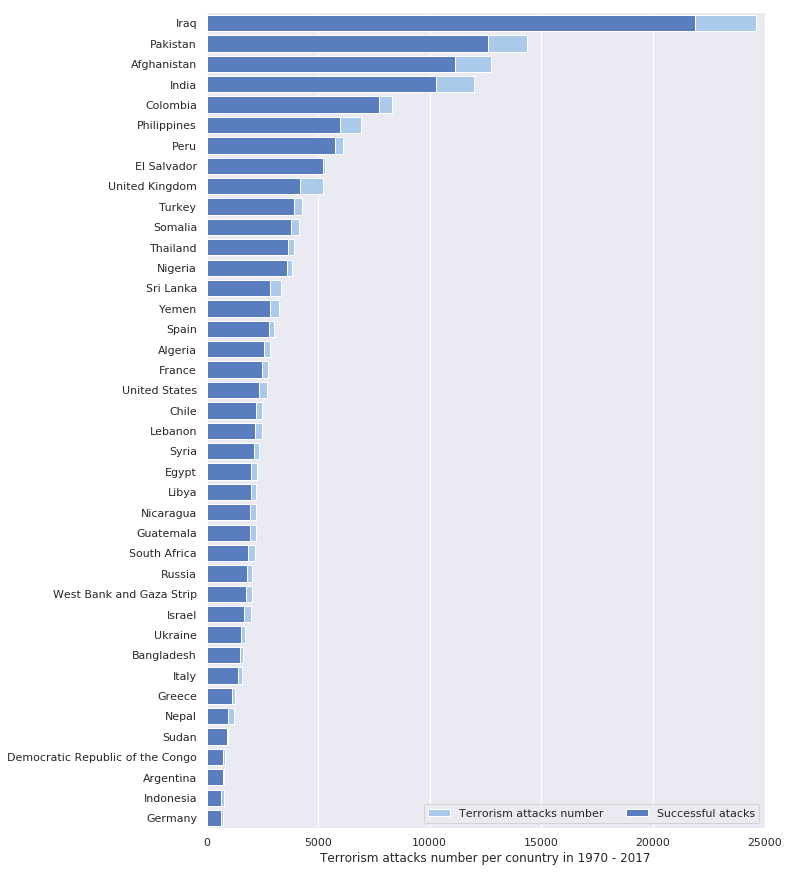

In [29]:
sns.set()
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="attacks", y="index", data=df_country,
            label="Terrorism attacks number", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="successful", y="index", data=df_success_country,
            label="Successful atacks", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(xlim=(0, 25000), ylabel="",
       xlabel="Terrorism attacks number per conuntry in 1970 - 2017")
sns.despine(left=True, bottom=True)